<a href="https://colab.research.google.com/github/nshamid/rock-paper-scissors_classification/blob/main/Rock_Paper_Scissors_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dataset_url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
response = requests.get(dataset_url)
with open('rockpaperscissors.zip', 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall()

base_dir = 'rockpaperscissors/rps-cv-images'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping]
)

accuracy = history.history['val_accuracy'][-1]
print(f"Akurasi validasi: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 - 18s - 423ms/step - accuracy: 0.3828 - loss: 1.1349 - val_accuracy: 0.4130 - val_loss: 1.0231
Epoch 2/20
42/42 - 12s - 275ms/step - accuracy: 0.5898 - loss: 0.8808 - val_accuracy: 0.7288 - val_loss: 0.5777
Epoch 3/20
42/42 - 12s - 279ms/step - accuracy: 0.7983 - loss: 0.5370 - val_accuracy: 0.9531 - val_loss: 0.1896
Epoch 4/20
42/42 - 11s - 273ms/step - accuracy: 0.8935 - loss: 0.3128 - val_accuracy: 0.9805 - val_loss: 0.0902
Epoch 5/20
42/42 - 21s - 500ms/step - accuracy: 0.9193 - loss: 0.2690 - val_accuracy: 0.7780 - val_loss: 0.5253
Epoch 6/20
42/42 - 12s - 285ms/step - accuracy: 0.8881 - loss: 0.3200 - val_accuracy: 0.9760 - val_loss: 0.1104
Epoch 7/20
42/42 - 12s - 283ms/step - accuracy: 0.9399 - loss: 0.1873 - val_accuracy: 0.9817 - val_loss: 0.0693
Epoch 8/20
42/42 - 21s - 489ms/step - accuracy: 0.9406 - loss: 0.1772 - val_accuracy: 0.9565 - val_loss: 0.1194
Epoch 9/20
42/42 - 12s - 283ms/step - accuracy: 0.9437 - loss: 0.1924 - val_accuracy: 0.9691 - val_loss: 0.1089
Aku

Saving tangan.jpg to tangan.jpg


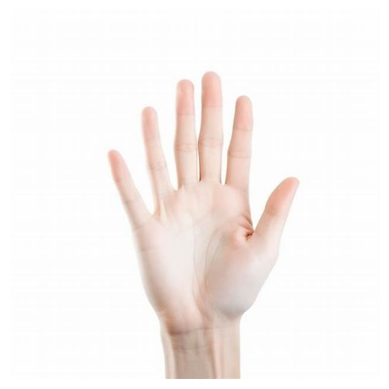

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
Gambar: tangan.jpg
Prediksi: paper


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_resized = cv2.resize(img_array, (150, 150))

    img_resized = img_resized / 255.0
    img_batch = np.expand_dims(img_resized, axis=0)


    classes = model.predict(img_batch)
    class_idx = np.argmax(classes)

    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_idx]

    print(f"Gambar: {fn}")
    print(f"Prediksi: {predicted_label}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


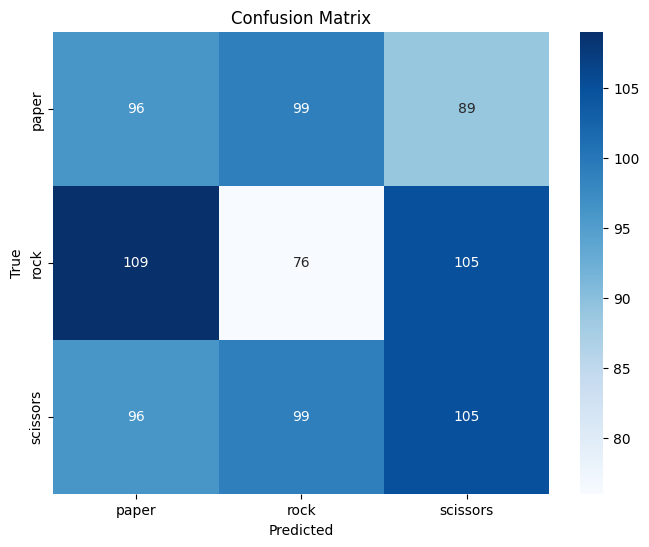

              precision    recall  f1-score   support

       paper       0.32      0.34      0.33       284
        rock       0.28      0.26      0.27       290
    scissors       0.35      0.35      0.35       300

    accuracy                           0.32       874
   macro avg       0.32      0.32      0.32       874
weighted avg       0.32      0.32      0.32       874



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
validation_generator.reset()  # Reset generator
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_labels = list(train_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(validation_generator.classes, y_pred, target_names=cm_labels))


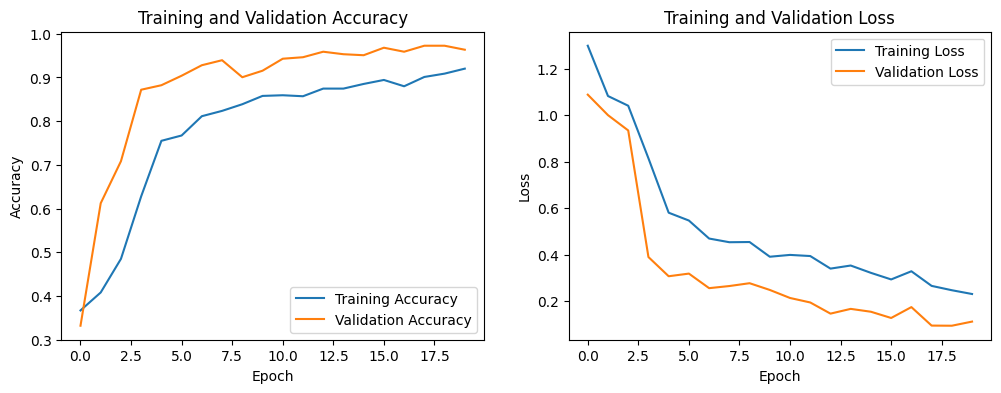

In [ ]:
# Plot Akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()